In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted)
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df = df.drop(columns=[
    'Days for shipping (real)',
    'Benefit per order',
    'Late_delivery_risk',
    'Category Id',
    'Customer State',
    'Order State',
    'Order Item Total',
    'Order Customer Id',
    'Order Id',
    'Order City',
    'Order Country',
    'Order Status',
    'Product Price',
], axis=1)

In [4]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [5]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [6]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [7]:
df_cont_var = df.select_dtypes(exclude='object')

In [8]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [9]:
df_ohe.dropna(inplace=True)

In [10]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [11]:
# x variable
X = df_ohe

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### SMOTE

In [13]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
scaler_x_train = scaler.transform(X_train)

In [15]:
scaler.fit(X_test)
scaler_x_test = scaler.transform(X_test)

In [16]:
# Synthetic minority over sampling
smote =  SMOTE()
x_smote_train, y_smote_train = smote.fit_resample(scaler_x_train, y_train)

##### Logistic Regression Models

##### Training Model

In [17]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(x_smote_train, y_smote_train)
lr_pred_train = logistic_regression.predict(x_smote_train)

In [18]:
print(classification_report(y_smote_train, lr_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.50      0.97      0.66     79105
   Late delivery       0.73      0.54      0.62     79105
Shipping on time       0.68      0.22      0.34     79105

        accuracy                           0.58    237315
       macro avg       0.64      0.58      0.54    237315
    weighted avg       0.64      0.58      0.54    237315



In [19]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, lr_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, lr_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, lr_pred_train)))

Mean Absolute Error: 0.6264880011798665
Mean Squared Error: 1.03280871415629
Root Mean Squared Error: 1.016271968597132


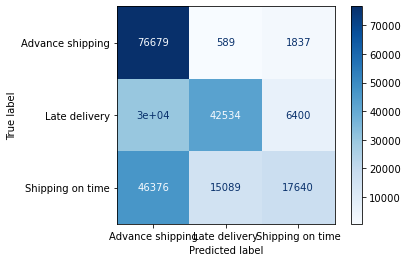

In [20]:
plot_confusion_matrix(logistic_regression, x_smote_train, y_smote_train,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [21]:
lr_pred_test = logistic_regression.predict(scaler_x_test)

In [22]:
print(classification_report(y_test, lr_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.41      0.98      0.58      8249
   Late delivery       0.90      0.51      0.65     19871
Shipping on time       0.38      0.20      0.27      6433

        accuracy                           0.56     34553
       macro avg       0.56      0.57      0.50     34553
    weighted avg       0.69      0.56      0.56     34553



In [23]:
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_pred_test)))

Mean Absolute Error: 0.5544525800943478
Mean Squared Error: 0.7926373976210459
Root Mean Squared Error: 0.8903018575859796


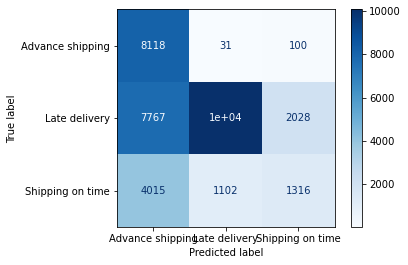

In [24]:
plot_confusion_matrix(logistic_regression, scaler_x_test, y_test,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

#### Random Forest Models

##### Training Models

In [25]:
rfc = RandomForestClassifier()
rfc.fit(x_smote_train, y_smote_train)
rfc_pred_train = rfc.predict(x_smote_train)

In [26]:
print(classification_report(y_smote_train, rfc_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       1.00      1.00      1.00     79105
   Late delivery       1.00      1.00      1.00     79105
Shipping on time       1.00      1.00      1.00     79105

        accuracy                           1.00    237315
       macro avg       1.00      1.00      1.00    237315
    weighted avg       1.00      1.00      1.00    237315



In [27]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, rfc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, rfc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, rfc_pred_train)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


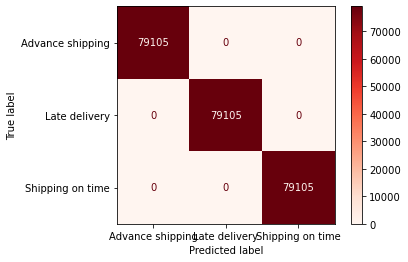

In [28]:
plot_confusion_matrix(rfc, x_smote_train, y_smote_train,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [29]:
rfc_pred_test = rfc.predict(scaler_x_test)

In [30]:
print(classification_report(y_test, rfc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.42      0.81      0.56      8249
   Late delivery       0.99      0.27      0.43     19871
Shipping on time       0.27      0.55      0.36      6433

        accuracy                           0.45     34553
       macro avg       0.56      0.54      0.45     34553
    weighted avg       0.72      0.45      0.44     34553



In [31]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_pred_test)))

Mean Absolute Error: 0.6760628599542732
Mean Squared Error: 0.9319017162040922
Root Mean Squared Error: 0.9653505664804326


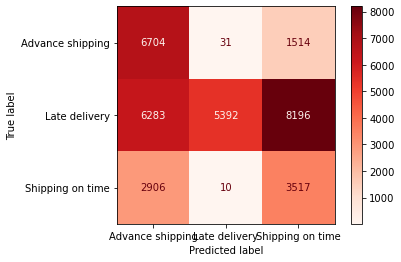

In [32]:
plot_confusion_matrix(rfc, scaler_x_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

#### XGBoost

##### Training Model

In [33]:
xgb = XGBClassifier()
xgb.fit(x_smote_train, y_smote_train)
xgb_pred_train = xgb.predict(x_smote_train)

[12:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
print(classification_report(y_smote_train, xgb_pred_train,  target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.62      0.88      0.73     79105
   Late delivery       0.78      0.78      0.78     79105
Shipping on time       0.88      0.50      0.64     79105

        accuracy                           0.72    237315
       macro avg       0.76      0.72      0.71    237315
    weighted avg       0.76      0.72      0.71    237315



In [35]:
print('Mean Absolute Error:', mean_absolute_error(y_smote_train, xgb_pred_train))
print('Mean Squared Error:', mean_squared_error(y_smote_train, xgb_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_smote_train, xgb_pred_train)))

Mean Absolute Error: 0.4122874660261677
Mean Squared Error: 0.6778164043570781
Root Mean Squared Error: 0.8232960611815643


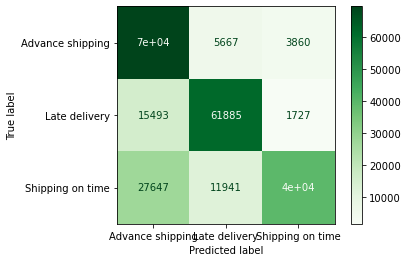

In [36]:
plot_confusion_matrix(xgb, x_smote_train, y_smote_train,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### Testing Model

In [37]:
xgb_pred_test = xgb.predict(scaler_x_test)

In [38]:
print(classification_report(y_test, xgb_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.44      0.42      0.43      8249
   Late delivery       1.00      0.25      0.40     19871
Shipping on time       0.23      0.78      0.36      6433

        accuracy                           0.39     34553
       macro avg       0.56      0.48      0.40     34553
    weighted avg       0.72      0.39      0.40     34553



In [39]:
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred_test)))

Mean Absolute Error: 0.7894828234885538
Mean Squared Error: 1.1487569820276098
Root Mean Squared Error: 1.071800812664186


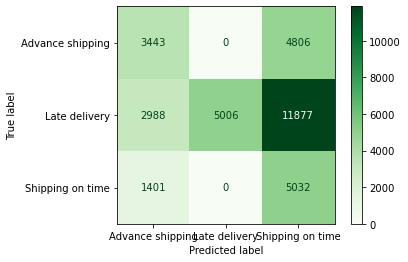

In [40]:
plot_confusion_matrix(xgb, scaler_x_test, y_test,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()